In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import tensorflow.keras as k
import tflearn.datasets.oxflower17 as oxflower17
from sklearn.preprocessing import OneHotEncoder

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
x_org,y_org=oxflower17.load_data()

**Please Note** : 
I tried extremely hard to find out actual string labels in the exact order of the corresponding y, which wasn't possible in given time. So, please be considerate with the one hot encoding.

The label for te flower below is :  11


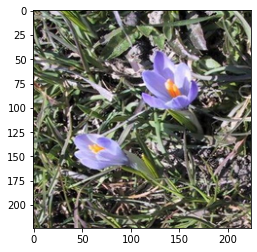

In [3]:
print("The label for te flower below is : ",y_org[1])
plt.imshow(x_org[1]) # The labels are not mentioned elsewhere..

In [4]:
tf.config.run_functions_eagerly(False)

In [5]:
x=x_org.copy()


import numpy as np
nb_classes = len(np.unique(y_org))
targets = y_org.reshape(-1)
y = np.eye(nb_classes)[targets]

In [6]:
y_org.shape

(1360,)

In [7]:
x_org.shape

(1360, 224, 224, 3)

In [8]:
x_org=x_org.astype("float32")

In [9]:
x_flat=x_org.copy()
x_flat=x_flat.reshape((x_flat.shape[0],-1))

**Please Note**

1. The application of filters here has been undertaken in Part 2 of this project since it was found appropriate and aiding to the discussion and answer there of why CNN's are such a big deal regarding the image processing.

2. The supervised learning models used here are the same as used in Part 1 of the project and are directly borrowed from my previous projects. 

# Supervised Learning Models

In [10]:
######################################################################
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
#from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score as area_under_curve
######################################################################

support_vector = SVC(C=10000,probability=True)
LR_model = LogisticRegression(solver="liblinear")
KNN = KNeighborsClassifier(n_neighbors= 10 , weights = 'distance')

###########################################################################
x_train,x_test,y_train,y_test=train_test_split(x_flat,y_org,test_size=0.2,random_state=1)

In [11]:
x_train.shape

(1088, 150528)

In [12]:
y_train

array([16,  2,  3, ...,  6, 15,  1])


Logistic Regression Model Score for Train Set :  1.0

Logistic Regression Model Score for Test Set :  0.4889705882352941

Logistic Regression Mapping


<AxesSubplot:>

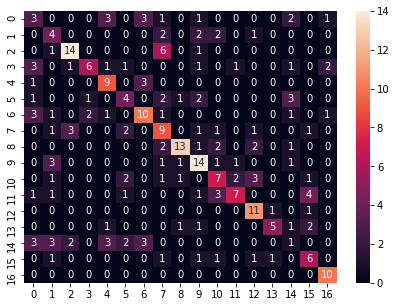

In [13]:
######################################################################
# Logistic Regression
######################################################################
LR_model.fit(x_train,y_train)
predict_LR = LR_model.predict(x_test)
####################################################
Accuracy_LR = accuracy_score(y_test, predict_LR)
Recall_LR = recall_score(y_test, predict_LR,average=None)
confusion_LR=metrics.confusion_matrix(y_test, predict_LR)
LR_Testscore=LR_model.score(x_test,y_test)
LR_Trainscore=LR_model.score(x_train,y_train)
#auc_LR=area_under_curve(y_test,predict_LR)
#####################################################
print("\nLogistic Regression Model Score for Train Set : ", LR_Trainscore)
print("\nLogistic Regression Model Score for Test Set : ", LR_Testscore)
#####################################################
df_confusion_LR = pd.DataFrame(confusion_LR)
print("\nLogistic Regression Mapping")
plt.figure(figsize = (7,5))
sns.heatmap(df_confusion_LR, annot=True)
######################################################################
#
######################################################################

The Original Image is shown below, of the test set :


The Predicated Label is : 0 
Original Label is : 14


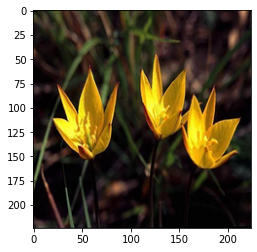

In [14]:
print("The Original Image is shown below, of the test set :")
plt.imshow(x_test[1].reshape(224,224,3))
print("\n\nThe Predicated Label is :",predict_LR[1],"\nOriginal Label is :",y_test[1])


KNN Model Train Score : 1.0

KNN Model Test Score : 0.34191176470588236

Confusion Matrix Mapping


<AxesSubplot:>

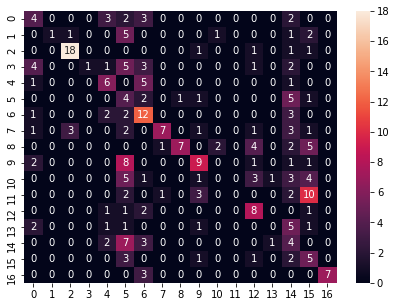

In [15]:
######################################################################
# K Nearest Neighbors
######################################################################
KNN.fit(x_train, y_train)
predict_KNN = KNN.predict(x_test)
####################################################
confusion_KNN=metrics.confusion_matrix(y_test, predict_KNN)
Accuracy_KNN = accuracy_score(y_test, predict_KNN)
Recall_KNN = recall_score(y_test, predict_KNN,average=None)
KNN_Testscore=KNN.score(x_test,y_test)
KNN_Trainscore=KNN.score(x_train,y_train)
####################################################
print("\nKNN Model Train Score :",KNN_Trainscore)
print("\nKNN Model Test Score :",KNN_Testscore)
####################################################
df_confusion_KNN = pd.DataFrame(confusion_KNN)
print("\nConfusion Matrix Mapping")
plt.figure(figsize = (7,5))
sns.heatmap(df_confusion_KNN, annot=True)
######################################################################
# 
######################################################################

The Original Image is shown below, of the test set :


The Predicated Label is : 14 
Original Label is : 14


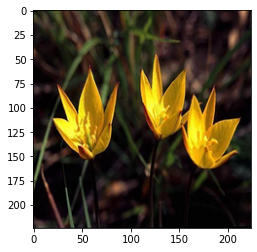

In [16]:
print("The Original Image is shown below, of the test set :")
plt.imshow(x_test[1].reshape(224,224,3))
print("\n\nThe Predicated Label is :",predict_KNN[1],"\nOriginal Label is :",y_test[1])


Support Vector Machine Model Test Score : 0.5367647058823529

Support Vector Machine Model Train Score : 1.0

Confusion Matrix Mapping


<AxesSubplot:>

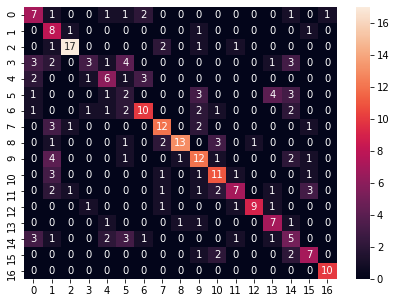

In [17]:
######################################################################
# Support Vector Machine
######################################################################
support_vector.fit(x_train, y_train)
predict_SVM = support_vector.predict(x_test)
####################################################
confusion_SVM=metrics.confusion_matrix(y_test, predict_SVM)
Accuracy_SVM = accuracy_score(y_test, predict_SVM)
Recall_SVM = recall_score(y_test, predict_SVM,average=None)
support_vector_Testscore=support_vector.score(x_test, y_test)
support_vector_Trainscore=support_vector.score(x_train, y_train)
####################################################
print("\nSupport Vector Machine Model Test Score :",support_vector_Testscore)
print("\nSupport Vector Machine Model Train Score :",support_vector_Trainscore)
####################################################
df_confusion_SVM = pd.DataFrame(confusion_SVM)
print("\nConfusion Matrix Mapping")
plt.figure(figsize = (7,5))
sns.heatmap(df_confusion_SVM, annot=True)
######################################################################
# 
######################################################################

The Original Image is shown below, of the test set :


The Predicated Label is : 14 
Original Label is : 14


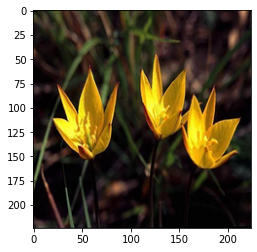

In [18]:
print("The Original Image is shown below, of the test set :")
plt.imshow(x_test[1].reshape(224,224,3))
print("\n\nThe Predicated Label is :",predict_SVM[1],"\nOriginal Label is :",y_test[1])

**Please Note** : My PC ran into frequent erros and Google Collab was too slow to handle this whole data. Hence, the above image data is being suppressed to lesser dimensions using image resizing mechanisms in sklearn.

I ran the same on Google Collab and it worked perfectly fine without the need for any kind of resizing. The link is given below. Please check it out.
https://colab.research.google.com/drive/1PHE7cPOj_ITkpnj_OslyFMyzT8IqM2rY?usp=sharing

In [19]:
from skimage.transform import resize
photos_resized=[]
for each in x_org:
    photos_resized.append(resize(each,(32,32)))

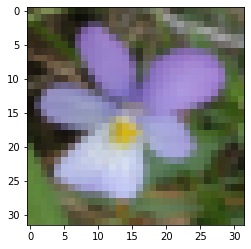

In [20]:
x=np.array(photos_resized)
plt.imshow(x[2])

In [21]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [22]:
tf.config.run_functions_eagerly(False)

In [23]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.layers import Conv2D
import tensorflow as tf
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,BatchNormalization
from tensorflow.keras.layers import Reshape
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers, optimizers

# Fully Connected Neural Network

In [24]:
from tensorflow.keras import regularizers, optimizers
import time
###################################################################
#Categorical Neural Network
###################################################################
model_cat_1=k.Sequential()
model_cat_1.add(Flatten(input_shape=(32,32,3)))

#model_cat_1.add(BatchNormalization())
model_cat_1.add(Dense(60,activation="sigmoid",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_cat_1.add(Dropout(0.2, input_shape=(60,)))
#model_cat_1.add(Dense(30,activation="relu",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
#model_cat_1.add(Dropout(0.2, input_shape=(30,)))
#model_cat_1.add(Dense(60,activation="sigmoid",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
#model_cat_1.add(Dropout(0.4, input_shape=(60,)))
#model_cat_1.add(Dense(60,activation="relu",kernel_initializer="random_normal",bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
#model_cat_1.add(Dropout(0.2, input_shape=(60,)))
#model_cat_1.add(Dense(60,activation="sigmoid",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
#model_cat_1.add(Dropout(0.4, input_shape=(60,)))
#model_cat_1.add(Dense(30,activation="sigmoid",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
#model_cat_1.add(Dropout(0.2, input_shape=(30,)))
#model_cat_1.add(Dense(30,activation="sigmoid",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
#model_cat_1.add(Dropout(0.2, input_shape=(30,)))
model_cat_1.add(Dense(65,activation="sigmoid",kernel_initializer="random_normal",bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_cat_1.add(Dense(17,activation="softmax"))
sgd = optimizers.SGD(lr = 0.01,momentum=0.3)
model_cat_1.compile(optimizer = sgd, loss = 'mse',metrics=["categorical_accuracy"])

t=time.time()
###################################################################
#
###################################################################
history_cat_1=model_cat_1.fit(x.astype("float32"),y,batch_size=15, validation_split=0.2, epochs = 100, verbose = 1)
print("Total Time Taken is : ",t-time.time())

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 1088 samples, validate on 272 samples
Epoch 1/100
1088/1088 [==============================] - 1s 847us/sample - loss: 4.6815 - categorical_accuracy: 0.0625 - val_loss: 4.5838 - val_categorical_accuracy: 0.0404
Epoch 2/100
1088/1088 [==============================] - 0s 149us/sample - loss: 4.4925 - categorical_accuracy: 0.0616 - val_loss: 4.3988 - val_categorical_accuracy: 0.0404


C:\Users\Sheshank_Joshi\anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\keras\engine\training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


Epoch 3/100
1088/1088 [==============================] - 0s 157us/sample - loss: 4.3112 - categorical_accuracy: 0.0597 - val_loss: 4.2213 - val_categorical_accuracy: 0.0404
Epoch 4/100
1088/1088 [==============================] - 0s 164us/sample - loss: 4.1373 - categorical_accuracy: 0.0616 - val_loss: 4.0511 - val_categorical_accuracy: 0.0404
Epoch 5/100
1088/1088 [==============================] - 0s 144us/sample - loss: 3.9705 - categorical_accuracy: 0.0662 - val_loss: 3.8878 - val_categorical_accuracy: 0.0404
Epoch 6/100
1088/1088 [==============================] - 0s 148us/sample - loss: 3.8105 - categorical_accuracy: 0.0625 - val_loss: 3.7312 - val_categorical_accuracy: 0.0404
Epoch 7/100
1088/1088 [==============================] - 0s 148us/sample - loss: 3.6571 - categorical_accuracy: 0.0607 - val_loss: 3.5810 - val_categorical_accuracy: 0.0404
Epoch 8/100
1088/1088 [==============================] - 0s 146us/sample - loss: 3.5099 - categorical_accuracy: 0.0616 - val_loss: 3.43

1088/1088 [==============================] - 0s 149us/sample - loss: 0.1399 - categorical_accuracy: 0.0634 - val_loss: 0.1382 - val_categorical_accuracy: 0.0404
Epoch 98/100
1088/1088 [==============================] - 0s 156us/sample - loss: 0.1365 - categorical_accuracy: 0.0634 - val_loss: 0.1348 - val_categorical_accuracy: 0.0404
Epoch 99/100
1088/1088 [==============================] - 0s 147us/sample - loss: 0.1332 - categorical_accuracy: 0.0634 - val_loss: 0.1316 - val_categorical_accuracy: 0.0404
Epoch 100/100
1088/1088 [==============================] - 0s 148us/sample - loss: 0.1300 - categorical_accuracy: 0.0634 - val_loss: 0.1285 - val_categorical_accuracy: 0.0404
Total Time Taken is :  -19.040915966033936


dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])


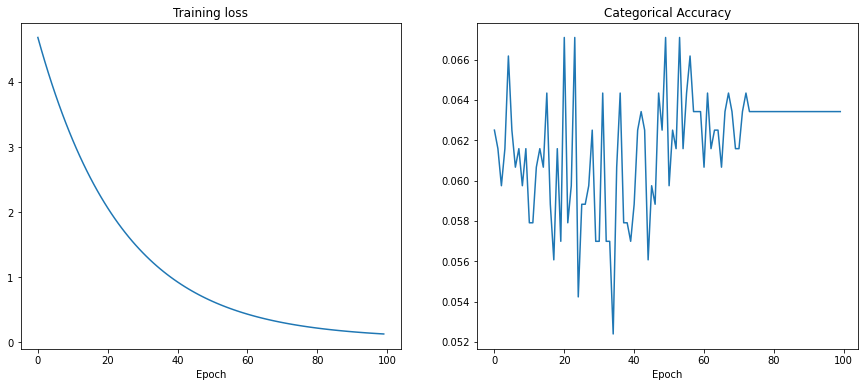

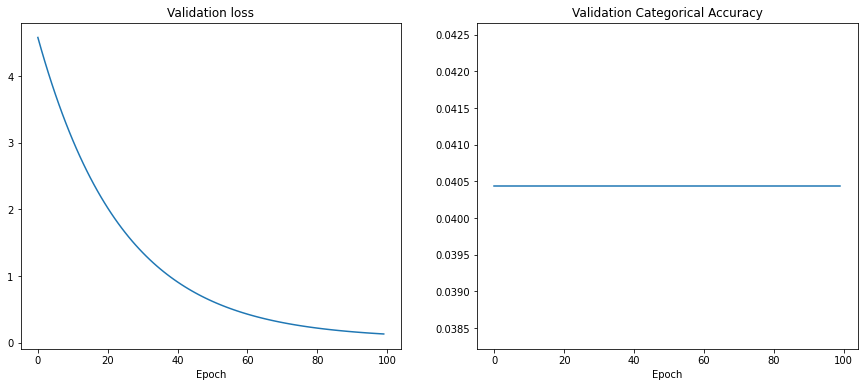

In [25]:
history=history_cat_1.history
print(history.keys())
fig=plt.figure(figsize=(15,6))
ax=fig.add_subplot(1,2,1)
ax.plot(history["loss"])
ax.set_title("Training loss")
ax.set_xlabel("Epoch")
ax.tick_params(axis="both",which="major")
ax=fig.add_subplot(1,2,2)
ax.plot(history["categorical_accuracy"])
ax.set_title("Categorical Accuracy")
ax.set_xlabel("Epoch")
ax.tick_params(axis="both",which="major")
plt.show()
#
fig=plt.figure(figsize=(15,6))
ax=fig.add_subplot(1,2,1)
ax.plot(history["val_loss"])
ax.set_title("Validation loss")
ax.set_xlabel("Epoch")
ax.tick_params(axis="both",which="major")
ax=fig.add_subplot(1,2,2)
ax.plot(history["val_categorical_accuracy"])
ax.set_title("Validation Categorical Accuracy")
ax.set_xlabel("Epoch")
ax.tick_params(axis="both",which="major")
plt.show()

# Convolution Neural Networks

In [26]:
# Initialize the model
model = Sequential()

# Add a Convolutional Layer with 32 filters of size 3X3 and activation function as 'relu' 
model.add(Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=(32,32,3)))

# Add a Convolutional Layer with 64 filters of size 3X3 and activation function as 'relu' 
model.add(Conv2D(filters=64, kernel_size=3, activation="relu"))

# Add a MaxPooling Layer of size 2X2 
model.add(MaxPooling2D(pool_size=(2, 2)))

# Apply Dropout with 0.2 probability 
model.add(Dropout(rate=0.2))

# Flatten the layer
model.add(Flatten())

# Add Fully Connected Layer with 128 units and activation function as 'relu'
model.add(Dense(64, activation="relu",kernel_initializer='random_uniform',kernel_regularizer="l2",bias_regularizer="l2"))

#Add Fully Connected Layer with 10 units and activation function as 'softmax'
model.add(Dense(17, activation="softmax",kernel_initializer='random_uniform',kernel_regularizer="l2",bias_regularizer="l2"))

# Compile the model
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

# Use earlystopping
#callback = tensorflow.keras.callbacks.EarlyStopping(monitor='val_acc', patience=2, min_delta=0.1)

# Fit the model
model.fit(x=x.astype("float32"), y=y, batch_size=20, epochs=50, validation_split=0.2)#, callbacks=[callback])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 1088 samples, validate on 272 samples
Epoch 1/50
1088/1088 [==============================] - 2s 2ms/sample - loss: 4.5859 - acc: 0.1259 - val_loss: 2.6179 - val_acc: 0.1434
Epoch 2/50
1088/1088 [==============================] - 0s 288us/sample - loss: 2.2871 - acc: 0.2601 - val_loss: 2.2219 - val_acc: 0.2426
Epoch 3/50
1088/1088 [==============================] - 0s 280us/sample - loss: 2.0680 - acc: 0.3529 - val_loss: 2.0743 - val_acc: 0.3346
Epoch 4/50
1088/1088 [==============================] - 0s 282us/sample - loss: 1.9871 - acc: 0.3732 - val_loss: 2.0002 - val_acc: 0.3603
Epoch 5/50
1088/1088 [==============================] - 0s 284us/sample - loss: 1.8639 - acc: 0.4357 - val_loss: 2.0531 - val_acc: 0.3419
Epoch 6/50
1088/1088 [==============================] - 0s 282us/sample - loss: 1.8496 - acc: 0.4412 - val_loss: 2.0015 - val_acc: 0.3824
Epoch 7/5

**On the Original Images not the downsized ones**

In [27]:
# Initialize the model
model = Sequential()

# Add a Convolutional Layer with 32 filters of size 3X3 and activation function as 'relu' 
model.add(Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=(224,224,3)))

# Add a Convolutional Layer with 64 filters of size 3X3 and activation function as 'relu' 
model.add(Conv2D(filters=64, kernel_size=3, activation="relu"))

# Add a MaxPooling Layer of size 2X2 
model.add(MaxPooling2D(pool_size=(2, 2)))

# Apply Dropout with 0.2 probability 
model.add(Dropout(rate=0.2))

# Flatten the layer
model.add(Flatten())

# Add Fully Connected Layer with 128 units and activation function as 'relu'
model.add(Dense(64, activation="relu",kernel_initializer='random_uniform',kernel_regularizer="l2",bias_regularizer="l2"))

#Add Fully Connected Layer with 10 units and activation function as 'softmax'
model.add(Dense(17, activation="softmax",kernel_initializer='random_uniform',kernel_regularizer="l2",bias_regularizer="l2"))

# Compile the model
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

# Use earlystopping
#callback = tensorflow.keras.callbacks.EarlyStopping(monitor='val_acc', patience=2, min_delta=0.1)

# Fit the model
model.fit(x=x_org.astype("float32"), y=y, batch_size=20, epochs=50, validation_split=0.2)#, callbacks=[callback])

Train on 1088 samples, validate on 272 samples
Epoch 1/50
1088/1088 [==============================] - 13s 12ms/sample - loss: 116.3395 - acc: 0.1599 - val_loss: 6.2309 - val_acc: 0.2904
Epoch 2/50
1088/1088 [==============================] - 11s 10ms/sample - loss: 3.2739 - acc: 0.3474 - val_loss: 2.5564 - val_acc: 0.3493
Epoch 3/50
1088/1088 [==============================] - 11s 10ms/sample - loss: 2.5152 - acc: 0.4265 - val_loss: 2.7416 - val_acc: 0.3162
Epoch 4/50
1088/1088 [==============================] - 11s 10ms/sample - loss: 2.4647 - acc: 0.4945 - val_loss: 2.3662 - val_acc: 0.4449
Epoch 5/50
1088/1088 [==============================] - 11s 10ms/sample - loss: 2.3002 - acc: 0.5110 - val_loss: 2.1301 - val_acc: 0.4890
Epoch 6/50
1088/1088 [==============================] - 11s 10ms/sample - loss: 2.1358 - acc: 0.5322 - val_loss: 2.4060 - val_acc: 0.4265
Epoch 7/50
1088/1088 [==============================] - 11s 10ms/sample - loss: 2.2403 - acc: 0.5294 - val_loss: 2.2445 - v

**Notes**

Though we get a considerable accuracy in train set, the validation set accuracy is extremely poor. That means we are overfitting so that means we need proper regularization mechanisms and perfect feedbacks.

# Transfer the learned models onto our set

In [28]:
from tensorflow.keras.applications import VGG16

In [29]:
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

#vgg_conv.add(Dense(17, activation="softmax",kernel_initializer='random_uniform',kernel_regularizer="l2",bias_regularizer="l2"))

model = Sequential()
 
# Add the vgg convolutional base model
model.add(vgg_conv)
 
# Add new layers
model.add(Flatten())
model.add(Dense(1024, activation='relu',kernel_initializer='random_uniform',kernel_regularizer="l2",bias_regularizer="l2"))
model.add(Dropout(0.5))
model.add(Dense(17, activation='softmax',kernel_initializer='random_uniform',kernel_regularizer="l2",bias_regularizer="l2"))
model.summary()
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")


model.fit(x=x.astype("float32"), y=y, batch_size=20, epochs=50, validation_split=0.2)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1024)              525312    
_________________________________________________________________
dropout_3 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 17)                17425     
Total params: 15,257,425
Trainable params: 15,257,425
Non-trainable params: 0
_________________________________________________________________
Train on 1088 samples, validate on 272 samples
Epoch 1/50
1088/1088 [==============================] - 5s 5m

Lets now try the above with the original picture size.

In [30]:
vgg_conv_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model2 = Sequential()
 
# Add the vgg convolutional base model
model2.add(vgg_conv_model)
 
# Add new layers
model2.add(Flatten())
model2.add(Dense(1024, activation='relu',kernel_initializer='random_uniform',kernel_regularizer="l2",bias_regularizer="l2"))
model2.add(Dropout(0.5))
model2.add(Dense(17, activation='softmax',kernel_initializer='random_uniform',kernel_regularizer="l2",bias_regularizer="l2"))
model2.summary()
model2.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizers.Adam(lr=0.0005))


model2.fit(x=x_org.astype("float32"), y=y, batch_size=20, epochs=50, validation_split=0.2)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_4 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 1024)              25691136  
_________________________________________________________________
dropout_4 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 17)                17425     
Total params: 40,423,249
Trainable params: 40,423,249
Non-trainable params: 0
_________________________________________________________________
Train on 1088 samples, validate on 272 samples
Epoch 1/50


ResourceExhaustedError: OOM when allocating tensor with shape[20,64,224,224] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node training_8/Adam/gradients/gradients/vgg16_1/block1_conv2/Conv2D_grad/Conv2DBackpropInput}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.


https://colab.research.google.com/drive/1PHE7cPOj_ITkpnj_OslyFMyzT8IqM2rY?usp=sharing

I have no idea why it is not working here, but in the above mentioned link (google colab) it works well. I guess its because of my system resources shortage.

In [31]:
vgg_conv_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
model3 = Sequential()
 
# Add the vgg convolutional base model
model3.add(vgg_conv_model)
 
# Add new layers
model3.add(Flatten())
model3.add(Dense(1024, activation='relu',kernel_initializer='random_uniform',kernel_regularizer="l2",bias_regularizer="l2"))
model3.add(Dropout(0.2))
model3.add(Dense(17, activation='softmax',kernel_initializer='random_uniform',kernel_regularizer="l2",bias_regularizer="l2"))
model3.summary()
model3.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizers.RMSprop(lr=2e-4))


model3.fit(x=x.astype("float32"), y=y, batch_size=10, epochs=48, validation_split=0.2)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_5 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 1024)              525312    
_________________________________________________________________
dropout_5 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 17)                17425     
Total params: 15,257,425
Trainable params: 15,257,425
Non-trainable params: 0
_________________________________________________________________
Train on 1088 samples, validate on 272 samples
Epoch 1/48
1088/1088 [==============================] - 8s 7m

# Pickling and Saving the Model

In [32]:
import os
model3.save('part4-Botanical.save')

In [33]:
model3 = tf.keras.models.load_model('part4-Botanical.save')

AttributeError: 'str' object has no attribute 'decode'

https://github.com/keras-team/keras/issues/14265

**Please Note**
Problem seems to be with h5py compatibility issues when saving strings. I don't know how to handle this because my system doesn't seem to downgrade from the current version.

This is going t be our final model with remarkable accuracy.

In [34]:
import cv2 as cv
temp_img=cv.imread("C:\\Users\\Sheshank_Joshi\\Dropbox\\code\\jupyter-AIML\\Projects\\Project 8 - Computer Vision\\17flowers\\jpg\\5\\image_0403.jpg")

In [35]:
temp_img.shape

(500, 524, 3)

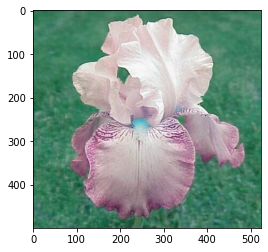

In [36]:
plt.imshow(temp_img)

In [37]:
temp_img=cv.resize(temp_img,(32,32)).reshape(1,32,32,3)

In [38]:
print(temp_img.shape)

(1, 32, 32, 3)


In [39]:
t=model3.predict(temp_img)[0]

In [40]:
def predict_label(matrix):
    #print("Entered function")
    for each in range(len(matrix)):
        if t[each]==1:
            print(each)

In [41]:
predict_label(t)

12


# GUI Interface with Prediction

In [44]:
from tkinter import * 
from tkinter.ttk import *
import tkinter as tk
#####################


class MyWindow(tk.Frame):
    # importing askopenfile function
    # from class filedialog
    from tkinter.filedialog import askopenfile
    from tkinter.filedialog import askopenfilename
    from tkinter.messagebox import showinfo
    from tkinter.messagebox import askquestion
    import tkinter as tk
    import numpy as np
    import pandas as pd
    import scipy as sp
    import itertools
    import time
    #import warnings
    #warnings.simplefilter("ignore")
    import tensorflow.keras
    from tensorflow.keras.layers import Dense
    from tensorflow.keras import regularizers, optimizers
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.utils import to_categorical
    from tensorflow.keras.layers import BatchNormalization, Dropout,Reshape,Activation,Dense,Flatten
    ###############################################
    file_retrived="File Imported Successfully"
    file_not_selected="Please select proper file"
    ###############################################
    #
    def __init__(self,master,model):
        super().__init__(master)
        ###################################################################
        # Object related Static Data
        ################################################################### 
        #Frame(self)
        self.open=True
        self.master=master
        master.title("Neural Network - GUI Interface")
        #print("Type of master is : ",type(self.master))
        #print("self is : ",type(self))
        #for item in dir(self):
            #print (item,"\n")
        self.message1=""
        self.message2=""
        self.model=model
        self.image=None # Data from the file stored as a pandas dataframe
        self.file=tk.StringVar() # File string of the exact location
        self.target_col=tk.StringVar() # Target column variable
        self.not_chosen_a_file=True
        self.opened_file_name=""
        #frame1=Frame(self)
        #frame1.pack(side=TOP,fill=X)
        #print("Type of frame is : ",type(frame1))
        
        ###################################################################
        # End of Static Data Initialization
        ################################################################### 
        
        ###################################################################
        # Frame Initializations
        ################################################################### 
        
        self.frame1=self.frame_setup()
        self.frame1.pack(side=TOP,fill=X)
        #
        self.frame2=self.frame_setup()
        self.frame2.pack(side=TOP,fill=X)
        #
        self.frame3=self.frame_setup()
        self.frame3.pack(side=TOP,fill=X)
        #
        self.frame4=self.frame_setup()
        self.frame4.pack(side=TOP,fill=X)
        #
        ###################################################################
        # End of Frame Initializations
        ###################################################################
        
        self.check=False # Just a check variable.
        
        ###################################################################
        # Column grid Initializations
        ################################################################### 
        self.Column1_init()
        self.Column2_init()
        self.Column3_init()
        self.Column4_init()
        ###################################################################
        # End of Column Grid Initializations
        ################################################################### 
        
        self.open=False # Another Check Variable
        #self.labelframe.mainloop()
        #self.mainloop()
    
    ###################################################################
    # Frame Setup Method
    ################################################################### 
    
    def frame_setup(self):
        return Frame(self.master)
    
    ###################################################################
    # End of Frame Setup Method
    ################################################################### 
    
    ###################################################################
    # Column1 Initialization Method
    ################################################################### 
    
    def Column1_init(self):

        w_width=len("Step 1 : File Name")
        label1=Label(self.frame1,text="Step 1 : File Name",justify=LEFT,anchor=W,width=w_width)
        label1.grid(row=0,column=0,sticky=N+W+E+S,padx=10)
        #
        label2=Label(self.frame2,text="Image Classifier",justify=LEFT,anchor=W,width=w_width)
        label2.grid(row=0,column=0,padx=10) 
        #
    
    ###################################################################
    # End of Column1 Initialization Method
    ################################################################### 
    
    ###################################################################
    # Column2 Initialization Method
    ###################################################################     
    
    def Column2_init(self,destroy=False):
        if (self.check):
            print("Successfully re-initialized Column2")
        length_2=27
        labelframe=LabelFrame(self.frame1,text="Open file",width=length_2)
        labelframe.grid(row=0,column=1,padx=5)
        #labelframe.grid_propagate()
        if self.not_chosen_a_file:
            #if self.check:
                #print("Button Still Loading")
            btn1 = Button(labelframe, text ='Browse',command = lambda : self.openfile(),width=length_2)
            btn1.pack(fill=X)
        else:
            #if self.check:
                #print("Textframe is loading")
            textframe=Text(labelframe,height=1,width=length_2-7)
            #scrollbar = Scrollbar(textframe,orient=HORIZONTAL)
            #scrollbar.pack(side = BOTTOM )            
            #scrollbar.config(command=textframe.xview)
            #textframe.config(xscrollcommand=scrollbar.set)
            self.opened_file_name=self.file.split("/")[-1]
            textframe.insert(END,self.opened_file_name)
            textframe.pack()
        #
        fr2=Frame(self.frame2)
        fr2.grid(row=1,column=1,padx=5)
        fr2.grid_propagate()
        btn2=Button(fr2,text="Predict",width=length_2,command=lambda : self.predict())
        btn2.pack(fill=X)

    ###################################################################
    # End of Column2 Initialization Method
    ################################################################### 
    
    ###################################################################
    # Column 3 Initialization Method
    ################################################################### 
    
    def Column3_init(self,destroy=False):
        length=len("Saved Model to the Disk")
        #
        fr6=Frame(self.frame1)
        fr6.grid(row=0,column=2,padx=5)
        fr6.grid_propagate()
        btn6=Button(fr6,text="Import Data",command=lambda : self.import_data_button(),width=length) 
        btn6.pack(fill=Y)
        #
        labelframe3=LabelFrame(self.frame2,text="Image Class prediction")
        text1=Label(labelframe3,width=length)
        if self.check:
            pass
            #print("Inside reinitialize",str(self.message2))
        text1["text"]=str(self.message2) #have to change this later
        text1.pack()
        labelframe3.grid(row=1,column=2,padx=5)
        #
    
    ###################################################################
    # End of Column3 Initialization Method
    ################################################################### 
    
    ###################################################################
    # Column 4 Initialization Method
    ###################################################################    
    
    def Column4_init(self,destroy=False):
        #
        text_success="Open File Success at Location "
        labelframe7=LabelFrame(self.frame1,text="Open File Status")
        labelframe7.grid(row=0,column=3,padx=5)
        text5=Label(labelframe7,width=len(text_success))
        text5["text"]=self.message1
        text5.pack()
        if self.open:
            labelframe7.grid_forget()
        #
        #
        #fr8=Frame(self.frame2,width=len(text_success))
        #fr8.grid(row=0,column=3,padx=5)
        #text6=Label(fr8)
        #text6["text"]=self.message1
        #text6.pack(fill=X)
        #if self.open:
        #    fr8.grid_forget()
        #
        text7=Label(self.frame4)
        text7["text"]="Designed by Sheshank Joshi for Great Learning Project"
        text7.grid(row=4,columnspan=4,sticky=W)
        #
    ###################################################################
    # End of Column4 Initialization Method
    ################################################################### 
   
    ###################################################################
    # Open File Method for Browse Button
    ################################################################### 
    def openfile(self):
        #print("file open function breached")
        if self.open:
            pass
        else:
            #print("file open function accessed")
            from tkinter.filedialog import askopenfilename
            self.file=askopenfilename()
            if self.file:
                self.not_chosen_a_file=False
                #print("File Successfully accessed",self.file)
                #self.check=True
                #print(self.file.split("/"))
                self.Column2_init()
    ###################################################################
    # End of Browse Button Method
    ################################################################### 
    
    ###################################################################
    # Training button Trigger method for Regression
    ################################################################### 
    def predict(self):
        from tkinter.messagebox import showinfo
        import cv2 as cv
        #code to import the image
        import time
        self.Column4_init(destroy=True)
        self.Column4_init()
        try:
            assert self.image is not None
        except:
            print("Please select an Image first")
            return
        try:
            ##assert self.model.predict(self.image.reshape((1,32,32)))
            print(self.model)
            #print(self.image.shape)
            #print(self.image.reshape(1,32,32,3).shape)
            imag=self.image.reshape((1,32,32,3))
            prediction=self.model.predict(imag.astype("float32"))
            #print(prediction[0])
            #print(self.predict_label(prediction[0]))
            self.message2=self.predict_label(prediction[0])
            #print("printing self.message2",self.message2)
        finally:
            self.progress_reg=False
            self.Column4_init()
            self.Column3_init()
    ###################################################################
    # End of Training Button Trigger Method
    ###################################################################
        
    ###################################################################
    # Import Data Button Trigger handler method.
    ################################################################### 
    
    def import_data_button(self):
        import pandas as pd
        import cv2 as cv
        #print("Entered the import data function")
        if (self.file):
            print(self.file)
            try:
                self.image=cv.imread(self.file)
                #print(self.image)
                self.message1=MyWindow.file_retrived
            except :
                self.message1=MyWindow.file_not_selected
            finally:
                self.image=cv.resize(self.image,(32,32)) #Only accepts 32 x 32 image for input
                #print("inside import data function")
                #print(self.image)
                #print(self.image.shape)
                self.open=False
                self.Column3_init()
                self.Column3_init()
                self.Column4_init()
                self.Column4_init()

    ###################################################################
    # End of Method to handle Import Data Button
    ################################################################### 
    
    def predict_label(self,matrix):
        #print("Entered function")
        for each in range(len(matrix)):
            #print (each)
            if t[each]==1:
                return each
    

if __name__=="__main__":
    root=Tk()
    root.resizable(width=False,height=False)
    root.geometry("700x150")
    window=MyWindow(root,model=model3)
    window.mainloop()

C:/Users/Sheshank_Joshi/Dropbox/code/jupyter-AIML/Projects/Project 8 - Computer Vision/17flowers/jpg/13/image_1046.jpg


# Part 5

**Support and Maintenance of Image classifier information after deployment**

Before I say anything, here the details and information from where I have developed my thoughts on this. It is quite general but nevertheless, credit and quote where it is due.

https://www.analyticsvidhya.com/blog/2019/10/deployed-machine-learning-model-post-production-monitoring/

After deployment, there is always some error. I think while the deployment itself, we have to desig it in such a way that whenever we have a wrong prediction tha tis not confirmed to be true, in the real-time/run-time situation, we should be able to take note of that particular data point and check if there is an emergence of pattern in it.

As the model has been exposed more and more to the data, the better and better in becomes. In that condition we can perhaps deploy a new model, with a kind of git version style, or we can update weights and modifications to the model and reinitialize models based on the new weights. It would then become the responsibility of the analytics company to continue to address the client's issues and keep bettering the models at regular intervals in terms of patches or something simialr.

It narrows down entirely to DevOps team to design how this is going to take place on the ground reality, but once the plan is laid in place either it can be outsourced or it can be appropriately established within the company.

On the other hand, we can continue our research and development into sub-models and sub-sub-models i.e. specialize our models to more specialized and specialized units and coordinate those units via an A.I coordinator. (much similar to parallel/cluster computing of dividing tasks at micro level).

AS time passes the classifier model needs to be exposed to more complicated, computationally intensive and also more varied images, so that human error of supplying wrong data to the model can be eliminated instead of involving humans. For e.g. an image classifier trained on human face recognition can't be used for flower classification. There is nothing in stopping a client from using it the wrong way i.e. face recognition on image classfication. The classifier would work randomly, chaotically and might be damaging in the long run for the model. On top of that we would need a specialist to look at why something has gone wrong i.e. to actually identify that it is wrong image that is being fed. So, primary classification mechanism takes front row when we need proper classification without human involvement.

I have no experience on DevOps so exact implementation details of version control and development cycle mechanism, I have no idea about. As suggested by the article, which is the source for my ideas here, we need to have both proactive and reactive modeling, i.e. address the issues both after they are arisen, and also in anticipation.


